In [49]:
import os
import sys
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity='all'
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
# 发送网络请求，抓取新闻内容
import requests
url = 'https://world.huanqiu.com/article/3zcq8qLg8j5'
r = requests.get(url)

In [51]:
# 将抓回来的页面转为易于解析的lxml格式
from lxml.html import fromstring
tree = fromstring(r.text)

In [52]:
# 使用cssselector&xpath抽取出新闻中的正文部分
elm = tree.cssselect('[data-type="rtext"]')[0]
text = ' '.join(elm.xpath('.//text()'))

In [53]:
# 导入jieba
import jieba.posseg as pseg
# 获取人物地点
words = pseg.lcut(text)
news_person = {word for word, flag in words if flag == 'nr'}
news_place = {word for word, flag in words if flag == 'ns'}
print('persons in news: ', news_person)
print('places in news: ', news_place)

persons in news:  {'特朗普', '邓仙', '王迎', '胡友松', '克林顿', '孙浩', '温和派', '易晓', '刘杰', '杨', '桑德斯', '鲍威尔', '施政', '永久性', '徐剑梅', '夏洛特', '白宫', '刘阳', '小布什', '檀', '孙丁', '麦凯恩'}
places in news:  {'奥巴马', '朝野', '华盛顿', '美国', '福利', '美刚', '北卡罗来纳州', '外国'}


In [54]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
# 输出关键词
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=2):
    print(item.word, item.weight)

关键词：
美国 0.03611163280997963
特朗普 0.029142699546706865
共和党 0.020552877132260953
总统 0.018715768070123682
大会 0.014363658703224078
记者 0.009311046611363406
候选人 0.007974107662153423
竞选 0.007525533482253814
支持 0.006815857675914715
新华社 0.0065335434289269835
建立 0.006466875269812906
选情 0.006384767507168185
支持率 0.006348043150325919
大选 0.006171562807494646
视频 0.006087382310759906
连任 0.006035459413489336
打破 0.005930469989076992
共和党人 0.00592427493121077
现任 0.00576604941072469
开幕 0.0056048515057160065


In [55]:
# 输出关键句
from textrank4zh import TextRank4Keyword, TextRank4Sentence
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

摘要：
15 0.05651923606401339 新华社记者 王迎 摄  538综合民调网站8月24日分析说，尽管数月来拜登在民调中稳定领先，且在共和党大会召开之际，和以往谋求连任的美国总统相比，特朗普同期支持率最低，不过，从现在到大选投票日，选举环境还可能发生很大变化，美国历史上不乏党代会时选情领先者在大选时被反超的先例
6 0.050696728318839035 请看新华社记者的报道--  打破传统 天天C位    美国共和党全国代表大会美国东部时间8月24日开幕，按流程，当天下午正式提名现任总统特朗普为2020年共和党总统候选人
9 0.04130160819133062 今年共和党大会可谓将造势的功能发挥到新高度，打破传统：为期4天的大会上，特朗普一反总统候选人最后发声的惯例，准备每天都露面讲话


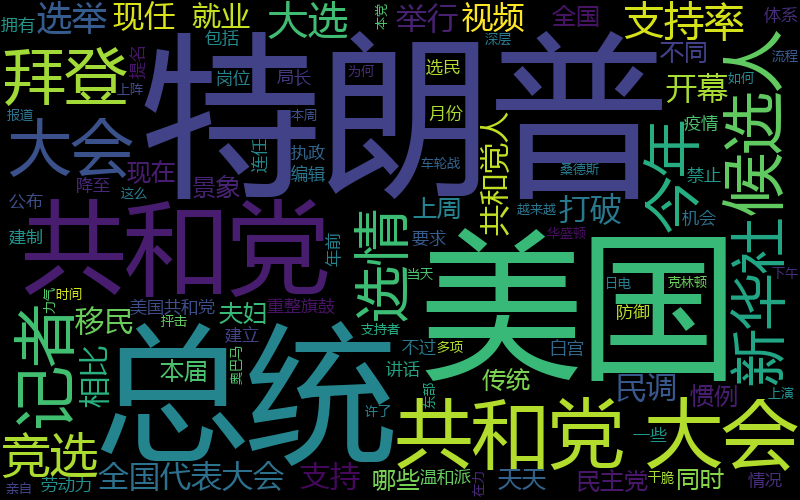

In [56]:
# 词云可视化
import os
from wordcloud import WordCloud
seg_list = jieba.lcut(text)
seg_list = list(filter(lambda w: len(w)>1, seg_list))  # 去掉长度小于1的词
cut_text = ' '.join(seg_list)
wordcloud = WordCloud(
    max_words=100,
    width=800,
    height=500,
    font_path='msyh.ttf'
).generate(cut_text)
img = wordcloud.to_image()
img